<a href="https://colab.research.google.com/github/SamuelA-R/Data-house-prices/blob/main/projetokc_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [9]:

data = pd.read_csv('kc_house_data.csv')

In [10]:
#verificação de banco de dados disponível
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
#Verificando se há colunas vazias
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#verificando os tipos de dados
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
#verificando os nomes das colunas disponíveis
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
#Eliminar valores acima de 500 milhões, pois é um possível erro no banco de dados
data = data[data['price'] <= 500000000] 

In [15]:
#convertendo os dados
data['date'] = pd.to_datetime(data['date'])

In [16]:
#Vamos criar novas colunas para saber a condição em que a casa se encontrar
data['apartament_condition'] = data['condition'].apply( lambda x: 'Ruim' if x <= 2
                                                  else 'Regular' if (x == 3) | (x ==4)
                                                  else 'Boa')

#Vamos criar uma coluna onde nos mostrar o preço por niveis 1 - as barata, 2 - mais cara
data['Nivel'] = data['price'].apply( lambda x: 'Nivel 0' if x > 0 and x <= 300000
                                    else 'Nivel 1' if x > 300000 and x <=450000
                                    else 'Nivel 2' if x > 450000 and x <= 650000
                                    else 'Nivel 3')

In [17]:
#Transformando a coluna Vista para o mar em string
data['waterfront'] = data['waterfront'].apply( lambda x: 'Yes' if x == 1 else 'No')

In [18]:
#Verificando os anos de reformas
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [19]:

#Retirando dados com anos igual a 0
ano_reforma = data[data['yr_renovated'] >= 1991]

Agora vamos fazer uma análise gráfica para identificar se as seguintes condições encarece casas na região:
- Condição do apartamento
- Vista para o mar
- Ano construido
- Ano que o apartamento recebeu reforma


<ipython-input-20-52a35750dc38>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


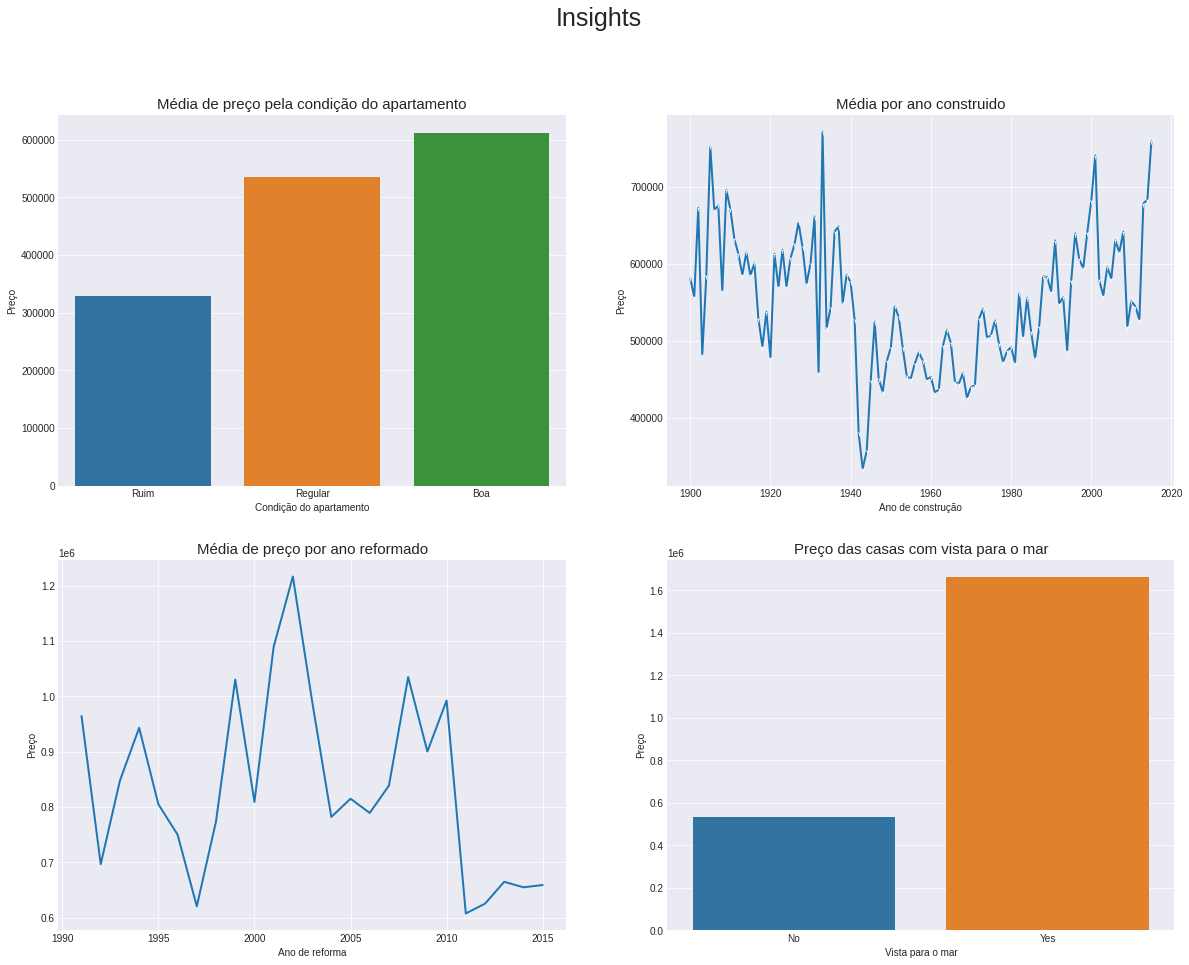

In [20]:
#Plot Gráficos
ax, fig = plt.subplots(2, 2, figsize=(20, 15))
#Estilo
plt.style.use('seaborn-darkgrid')

#GRÁFICO 1
plt.subplot(2, 2, 1)
#Título
plt.title('Média de preço pela condição do apartamento', fontsize=15)
#Agrupando os dados pela condição do apartamento
df = data[['price', 'apartament_condition']].groupby( 'apartament_condition' ).mean().reset_index()
df = df.sort_values('price')
#gráfico
sns.barplot( data=df, x ='apartament_condition', y='price' )
#renomeando eixos x e y
plt.xlabel('Condição do apartamento')
plt.ylabel('Preço')

#GRÁFICO 2
plt.subplot(2, 2, 2)
#Título
plt.title('Média por ano construido', fontsize=15)
#Agrupando os dados por seus ano construindo
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
#Gráfico
sns.lineplot( x='yr_built', y='price', data=df, lw=2, marker='1' )
#renomeando eixos x e y
plt.xlabel('Ano de construção')
plt.ylabel('Preço')

#GRÁFICO 3
plt.subplot(2, 2, 3)
#Título
plt.title('Média de preço por ano reformado', fontsize=15)
#Agrupando os dados pelo ano que foram reformados
df = ano_reforma[['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()
#Gráfico
sns.lineplot( x='yr_renovated', y='price', data=df, lw=2 )
#renomeando eixos x e y
plt.xlabel('Ano de reforma')
plt.ylabel('Preço')

#GRÁFICO 3
plt.subplot(2, 2, 4)
#Titulo
plt.title('Preço das casas com vista para o mar', fontsize=15)
#Agrupando os dados com vista ou não vista para o mar
df = data[['price', 'waterfront']].groupby( 'waterfront' ).mean().reset_index()
#Gráfico
sns.barplot( x='waterfront', y='price', data=df )
#renomeando eixos x e y
plt.xlabel('Vista para o mar')
plt.ylabel('Preço')

#Titulo do dashboard
plt.suptitle('Insights', fontsize=25)

plt.show()

In [23]:
#Desenhando mapa com os preços por nível e a localização geográfica das casas
def draw_map( data ):
  # mapa
  data = data.sort_values(by='Nivel', ascending=True)
  houses = data[['id', 'lat', 'long', 'price', 'Nivel']].copy()
  fig = px.scatter_mapbox( houses,
                          lat="lat",
                          lon="long",
                          color="Nivel",
                          size="price",
                          color_continuous_scale=px.colors.cyclical.IceFire,
                          size_max=15,
                          zoom=10 )
  
  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})

  return fig

draw_map( data )

## Conclusão
- A condição do imóvel encarece o seu preço
- Casas com vista para o mar são mais caras

